<a href="https://colab.research.google.com/github/Massato01/Analise-Normalidade/blob/main/analise_normalidade_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bibliotecas

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Importando o dataset
> winequality-red
> * Dataset já limpo

In [59]:
df = pd.read_csv("winequality-red.csv")
df.shape

(1599, 12)

In [60]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Mapa de calor das correlações de todas as variáveis

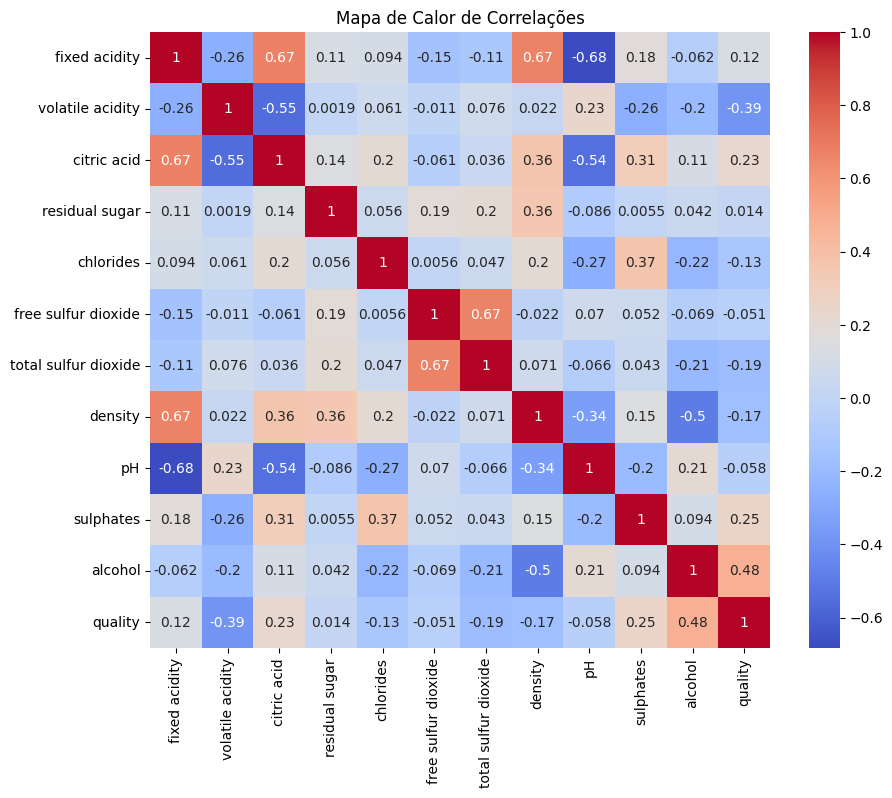

In [61]:
correlacoes = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlações")
plt.show()

### Definindo as variáveis e plotando sua dispersão

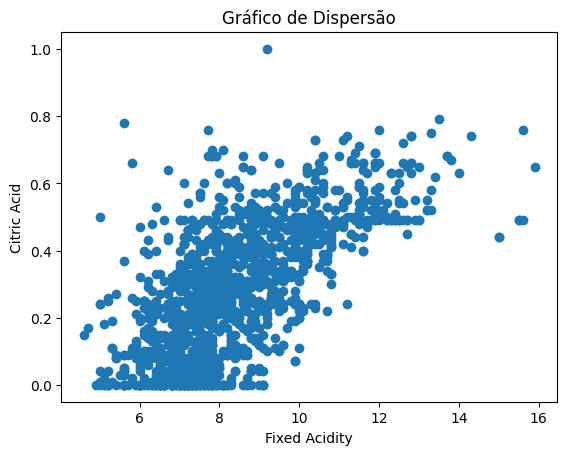

In [62]:
X = df['fixed acidity']
y = df['citric acid']

# Gráfico de dispersão de Fixed Acidity e Citric Acid
plt.scatter(X, y)
plt.xlabel("Fixed Acidity")
plt.ylabel("Citric Acid")
plt.title("Gráfico de Dispersão")
plt.show()

### Mediana, Variância, Desvio Padrão e Mediana

In [63]:
# Média
media_x = X.mean() # 8.32
media_y = y.mean() # 0.27

# Variância
variancia_x = X.var() # 3.03
variancia_y = y.var() # 0.04

# Desvio Padrão
desvio_padrao_x = X.std() # 1.74
desvio_padrao_y = y.std() # 0.19

# Mediana
mediana_x = X.median() # 7.9
mediana_y = y.median() # 0.26

print(f'{media_x = }\n')
print(f'{media_y = }\n')
print(f'{variancia_x = }\n')
print(f'{variancia_y = }\n')
print(f'{desvio_padrao_x = }\n')
print(f'{desvio_padrao_y = }\n')
print(f'{mediana_x = }\n')
print(f'{mediana_y = }')

media_x = 8.31963727329581

media_y = 0.2709756097560976

variancia_x = 3.0314163889978167

variancia_y = 0.03794748313440581

desvio_padrao_x = 1.7410963181276953

desvio_padrao_y = 0.19480113740531857

mediana_x = 7.9

mediana_y = 0.26


### Histograma de Fixed Acidity

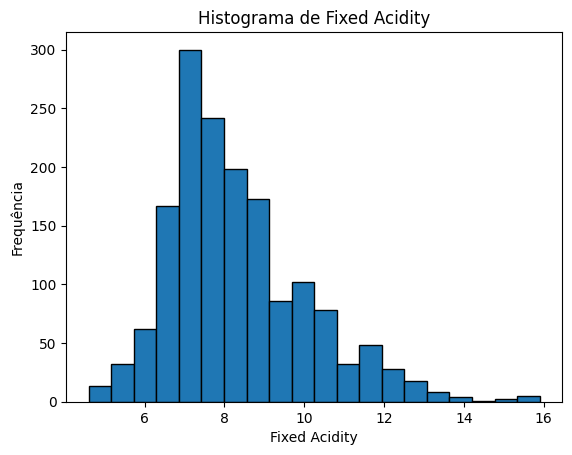

In [64]:
plt.hist(X, bins=20, edgecolor='k')
plt.xlabel("Fixed Acidity")
plt.ylabel("Frequência")
plt.title("Histograma de Fixed Acidity")
plt.show()

### Histograma de Citric Acid

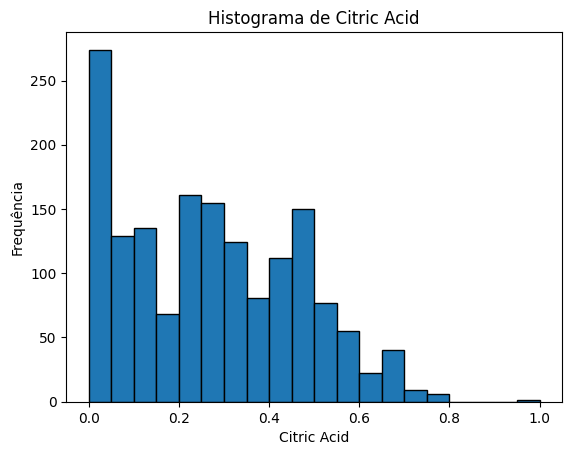

In [65]:
plt.hist(y, bins=20, edgecolor='k')
plt.xlabel("Citric Acid")
plt.ylabel("Frequência")
plt.title("Histograma de Citric Acid")
plt.show()

### Boxplot de Fixed Acidity

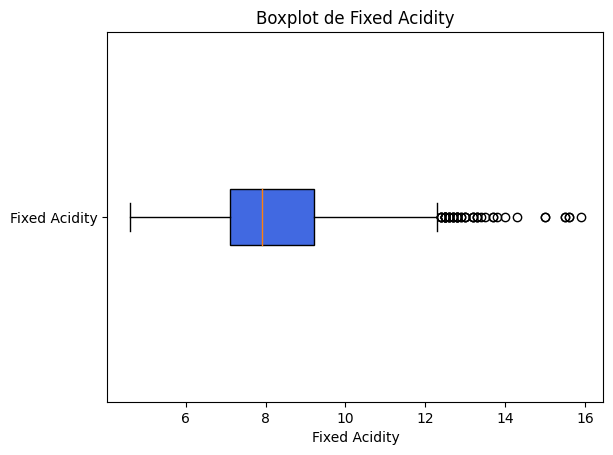

In [66]:
plt.boxplot(X, vert=False, labels=["Fixed Acidity"], patch_artist=True, boxprops=dict(facecolor='royalblue'))
plt.title("Boxplot de Fixed Acidity")
plt.xlabel("Fixed Acidity")
plt.show()

### Boxplot de Citric Acid

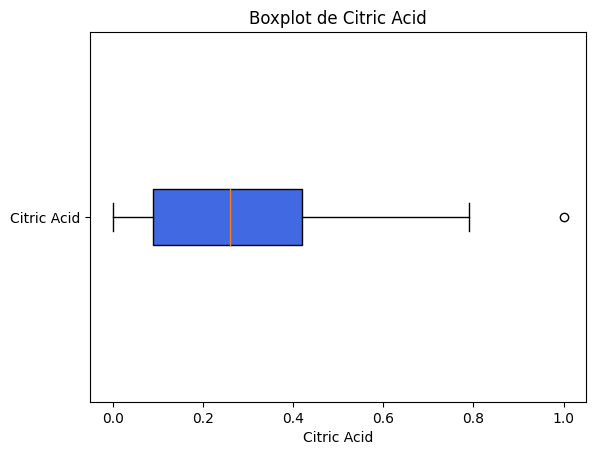

In [67]:
plt.boxplot(y, vert=False, labels=["Citric Acid"], patch_artist=True, boxprops=dict(facecolor='royalblue'))
plt.title("Boxplot de Citric Acid")
plt.xlabel("Citric Acid")
plt.show()

### Correlação entre Fixed Acidity e Citric Acid

In [68]:
correlacao = X.corr(y) # 0.67
correlacao

0.671703434764106

### Testes de normalidade

In [69]:
# Teste de normalidade de Fixed Acidity
teste_normal_x = stats.shapiro(X) # W = 0.94203, p-value < 2.2e-16
print('Fixed Acidity')
print(f'W = {teste_normal_x[0]}; p-value = {teste_normal_x[1]}')

# Teste de normalidade de Citric Acid
teste_normal_y = stats.shapiro(y) # W = 0.95529, p-value < 2.2e-16
print('\nCitric Acid')
print(f'W = {teste_normal_y[0]}; p-value = {teste_normal_y[1]}')

Fixed Acidity
W = 0.9420264959335327; p-value = 1.5227779442162196e-24

Citric Acid
W = 0.955294668674469; p-value = 1.0233944777578548e-21


### Gráfico de densidade junto com o histograma de Fixed Acidity

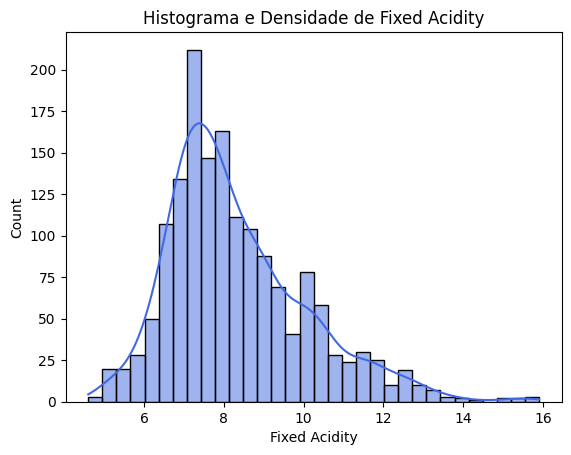

In [72]:
sns.histplot(data=df, x='fixed acidity', kde=True, color='royalblue')
plt.title("Histograma e Densidade de Fixed Acidity")
plt.xlabel("Fixed Acidity")
plt.show()

### Regressão Linear Simples de Fixed Acidity e Citric Acid

Coeficiente de Determinação (R²): 0.45118550427389736
Coeficiente Angular: 0.07515298937155657
Intercepto: -0.3542700018191083


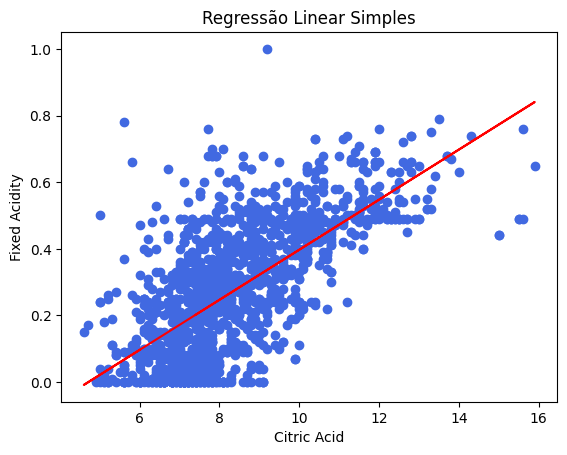

In [71]:
from sklearn.linear_model import LinearRegression

X = X.values.reshape(-1, 1)
y = y.values

modelo = LinearRegression()
modelo.fit(X, y)

coeficiente_angular = modelo.coef_[0]
intercepto = modelo.intercept_
r_squared = modelo.score(X, y)

print(f'Coeficiente de Determinação (R²): {r_squared}')
print(f'Coeficiente Angular: {coeficiente_angular}')
print(f'Intercepto: {intercepto}')

plt.scatter(X, y, color='royalblue')
plt.plot(X, modelo.predict(X), color='red')
plt.xlabel("Citric Acid")
plt.ylabel("Fixed Acidity")
plt.title("Regressão Linear Simples")
plt.show()